# Algorithm Evaluation 

##### 1 . find best algorithm for given data

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")


### Step 1- Data Ingestion 

In [2]:
import pandas as pd 
df =pd.read_csv("train_loan.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


### Target - loan_Status
##### 1.0 - loan Regected
##### 2.1- loan Approved

Step 2- Perform Basic Data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [ ]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Seperate X and Y (loan_Status)

##### drop id columns as is statistically insignificant

In [6]:

x= df.drop(columns=["id", "loan_status"])
Y= df[["loan_status"]]

In [7]:
x.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [8]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


In [9]:
Y.value_counts()

loan_status
0              50295
1               8350
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

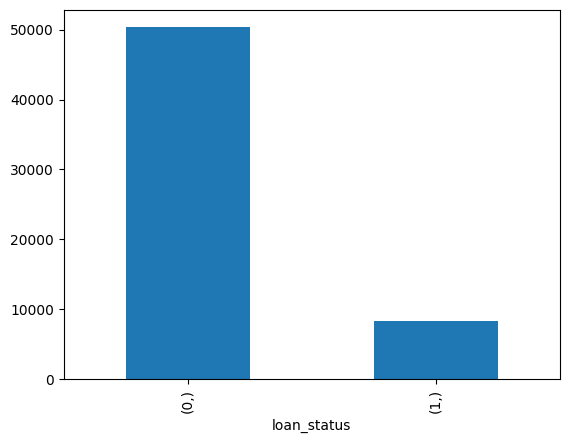

In [10]:
Y.value_counts().plot(kind ="bar")

### Step 4 - Apply Preprocessing on X

In [11]:
x.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [12]:
cat = list(x.columns[x.dtypes=="object"])
con = list(x.columns[x.dtypes != "object"])

In [13]:
cat

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [14]:
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [17]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False)
    
)

In [18]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")

In [19]:
x_pre = pre.fit_transform(x)
x_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 5 Apply train test split on x_pre

In [20]:
from sklearn.model_selection import train_test_split
from xgboost import train
xtrain, xtest , ytrain , ytest = train_test_split(x_pre, Y, test_size=0.2, random_state=42 )

In [21]:
xtrain.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
14337,1.400450,-0.370311,-1.187200,-0.362625,1.045295,-0.209808,2.279989,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091305,-0.549585,-0.429576,-0.758041,0.323635,-0.427932,0.790845,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422806,0.156966,-1.187200,-0.218837,-0.921970,-0.536994,-0.698298,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
55811,1.897701,0.288785,-0.682117,1.039305,-1.363533,0.444564,1.287227,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40120,-0.920057,-0.486311,0.075506,-0.937775,-0.994465,-0.755118,-0.946489,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
ytrain.head()

,loan_status
14337,0
17117,0
32590,0
55811,0
40120,0


In [23]:
xtest.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
4657,-0.754307,-0.633949,-1.187200,-0.991696,-0.882427,-0.755118,-0.450108,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56440,-0.422806,-0.106673,1.085671,-0.758041,-0.688007,-0.864180,-0.450108,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42117,0.737448,0.059419,-1.187200,1.937978,0.610322,1.098935,0.046274,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10849,-0.920057,-0.897587,-1.187200,-0.758041,-0.028957,0.117378,-0.946489,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39395,-0.091305,-0.106673,-0.934659,-0.398572,0.504874,-0.427932,1.039036,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [25]:
xtrain.shape

(46916, 26)

In [26]:
xtest.shape

(11729, 26)

### Step 6 - Algorithm Evaluation

##### 1.SVM and KNN are suitable for smaller datasets upto 1000 rows

##### 2.skip SVM and KNN for this dataset

In [27]:
%pip install xgboost joblib 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import xgboost as xgb

In [29]:
models=[
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()
]

In [30]:
models[0].__class__.__name__

'LogisticRegression'

In [31]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [32]:
def evaluate_single_model(model, xtrain, ytrain, xtest, ytest):
    #fit the model 
    model.fit(xtrain,ytrain)
    # predict the result for train and test 
    ypred_train= model.predict(xtrain)
    ypred_test = model.predict(xtest)
    # calculated f1_macro for train and test 
    f1_train = f1_score(ytrain,ypred_train,average="macro")
    f1_test= f1_score(ytest ,ypred_test,average="macro")
    # 5 fold crossvalidation on train data 
    scores = cross_val_score(model,xtrain, ytrain,cv=5, scoring="f1_score",n_jobs=1)
    f1_cv = scores.mean()
    # create a dictionary for final results
    res ={
        "model_name": model.__class__.__name__,
        "model": model,
        "f1 train": f1_train,
        "f1 test ": f1_test,
        "f1 cv": f1_cv
    }
    return res


In [33]:
from unittest import result

from numpy import sort


def algo__evaluation (models: list, xtrain, ytrain , xtest,ytest):
    # Intialize blank list for results
    result = []
    # Apply for loop on models
    for model in models:
        r= evaluate_single_model(model, xtrain,ytrain,xtest,ytest)
        print(r)
        result.append(r)
        # save the results  in dataframe 
        res_df = pd.DataFrame(results)
        # sort the results
        sort_df = res_df.sort_values(by="f1 cv", ascending=False).reset_index(drop=True)
        # Get the best model 
        best_model= sort_df.loc[0,"model"]
        return sort_df.round(4), best_model 

In [34]:
models

[LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)]

In [37]:
res_df, best_model = algo__evaluation(models, xtrain, ytrain, xtest, ytest)


InvalidParameterError: The 'scoring' parameter of cross_val_score must be a str among {'jaccard_samples', 'roc_auc_ovr_weighted', 'positive_likelihood_ratio', 'neg_median_absolute_error', 'mutual_info_score', 'f1_macro', 'recall_macro', 'precision', 'neg_brier_score', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'matthews_corrcoef', 'r2', 'jaccard_weighted', 'recall_micro', 'fowlkes_mallows_score', 'precision_micro', 'recall', 'neg_mean_poisson_deviance', 'rand_score', 'roc_auc_ovr', 'jaccard_macro', 'v_measure_score', 'd2_absolute_error_score', 'roc_auc_ovo', 'neg_negative_likelihood_ratio', 'top_k_accuracy', 'neg_mean_gamma_deviance', 'max_error', 'homogeneity_score', 'f1_weighted', 'neg_log_loss', 'f1_samples', 'precision_weighted', 'explained_variance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_log_error', 'recall_samples', 'average_precision', 'balanced_accuracy', 'jaccard_micro', 'f1_micro', 'accuracy', 'adjusted_mutual_info_score', 'roc_auc', 'roc_auc_ovo_weighted', 'recall_weighted', 'adjusted_rand_score', 'precision_macro', 'f1', 'precision_samples', 'jaccard', 'completeness_score'}, a callable or None. Got 'f1_score' instead.